In [1]:
%cd ".."

c:\Users\jmpreussa\Documents\simce


c:\Users\jmpreussa\Documents\simce\.venv\lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
from itertools import chain
import numpy as np
import cv2
import matplotlib.pyplot as plt
import re
from pathlib import Path
from time import time
#from simce.utils import dic_img_preg
import pandas as pd
from matplotlib import cm
import pandas as pd
from simce.utils import ls
from simce.proc_imgs import get_mask_naranjo

### Subpreguntas

probar segmentacion de imagen por bloques segun linea

In [3]:
# Funciones ---------------------------------------------------------------------

### Procesamiento imagen

def recorte_imagen(img_preg, x0 =130, x1= 30, y0 = 50, y1=50):
    """Funcion para recortar margenes de las imagenes

    Args:
        img_preg (array imagen): _description_
        x0 (int, optional): _description_. Defaults to 130.
        x1 (int, optional): _description_. Defaults to 30.
        y0 (int, optional): _description_. Defaults to 50.
        y1 (int, optional): _description_. Defaults to 50.

    Returns:
        (array imagen): imagen cortada
    """
    
    x,y = img_preg.shape[:2]
    img_crop = img_preg[x0:x-x1, y0:y-y1]
    return img_crop


def procesamiento_color(img_crop):
    """
    Funcion que procesa el color de la imagen

    Args:
        img_crop (_type_): imagen recortada

    Returns:
        canny image 
    """
    # transformando color
    gray = cv2.cvtColor(img_crop, cv2.COLOR_BGR2GRAY)
    #blur = cv2.GaussianBlur(gray, (5, 5), 0)
    Canny = cv2.Canny(gray, 50, 150, apertureSize=3)
    
    return Canny


### Procesamiento sub-pregunta

def obtener_puntos(img_crop_canny, threshold = 100, minLineLength = 100):
    """
    Funcion que identifica lineas para obtener puntos en el eje "y" para realizar el recorte a subpreguntas

    Args:
        img_crop_canny (_type_): _description_

    Returns:
        lines: _description_
    """
    # obteniendo lineas
    lines = cv2.HoughLinesP(img_crop_canny, 1, np.pi/180, threshold= threshold, minLineLength = minLineLength)
    
    indices_ordenados = np.argsort(lines[:, :, 1].flatten())
    lines_sorted = lines[indices_ordenados]
    
    puntoy = list(set(chain.from_iterable(lines_sorted[:, :,1].tolist())))
    puntoy.append(img_crop_canny.shape[0])
    puntoy = sorted(puntoy)
    
    print(puntoy)
    
    y = []
    for i in range(len(puntoy)-1):
        if puntoy[i+1]- puntoy[i]<35:
            y.append(i+1)

    print(puntoy)
    print(y)
    
    for index in sorted(y, reverse=True):
        del puntoy[index]
    
    return puntoy

In [47]:
preg = r'data\output_preg\09954\4272428_p3.jpg' #r'data\output_preg\09952\4272374_p8.jpg'
img_preg = cv2.imread(str(preg),1)

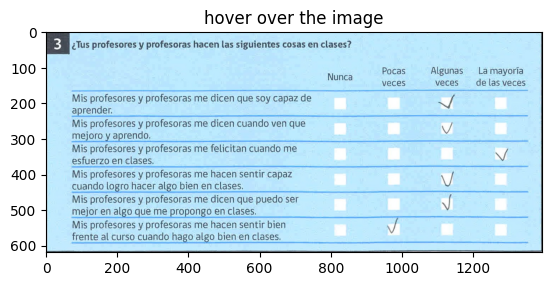

In [48]:
# plot image
fig,ax = plt.subplots()    
myax = ax.imshow(img_preg, cmap=cm.jet)

ax.set_title('hover over the image')

plt.show()

In [49]:
img_crop = recorte_imagen(img_preg)
media_img = img_crop

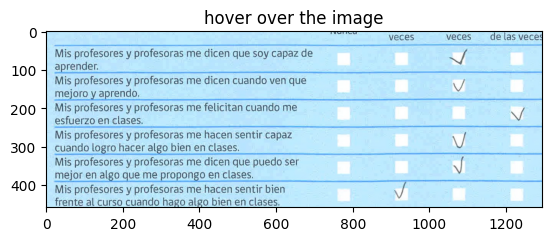

In [50]:
# plot image
fig,ax = plt.subplots()    
myax = ax.imshow(media_img, cmap=cm.jet)

ax.set_title('hover over the image')

plt.show()

In [51]:
# media_img = procesamiento_color(media_img)

media_img = get_mask_naranjo(media_img, lower_color=np.array([0, 114, 139]), upper_color = np.array([17, 255, 255]))

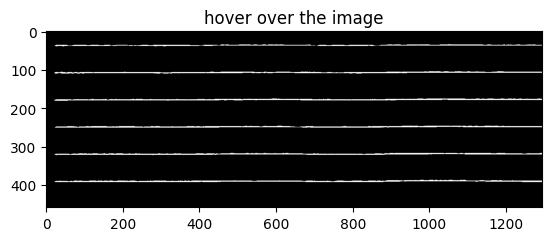

In [55]:
# plot image
fig,ax = plt.subplots()    
myax = ax.imshow(media_img, cmap=cm.gray)

ax.set_title('hover over the image')

plt.show()

In [53]:
## VIZ
lines = cv2.HoughLinesP(media_img, 1, np.pi/180, threshold= 100, minLineLength = 100)
for l in lines:
    for x,y,w,h in l:
        cv2.line(img_crop,(x,y),(w,h),(0,255,0),2)
 
cv2.imwrite('imagen_con_lineas.jpg', img_crop)


True

In [54]:
puntoy = obtener_puntos(media_img)

[35, 36, 37, 38, 106, 107, 108, 109, 177, 178, 179, 180, 248, 249, 250, 251, 318, 319, 320, 321, 322, 389, 390, 391, 392, 393, 459]
[35, 36, 37, 38, 106, 107, 108, 109, 177, 178, 179, 180, 248, 249, 250, 251, 318, 319, 320, 321, 322, 389, 390, 391, 392, 393, 459]
[1, 2, 3, 5, 6, 7, 9, 10, 11, 13, 14, 15, 17, 18, 19, 20, 22, 23, 24, 25]


In [56]:
puntoy

[35, 106, 177, 248, 318, 389, 459]

In [57]:
n = 1
for i in range(len(puntoy)-1):
    cropped_img = img_crop[puntoy[i]:puntoy[i+1],]
    y0 = i
    
    page = 'Subpregunta'
    id_img = f'{page}_{n}'
    n += 1
    file_out = f'{id_img}.jpg'
    print(file_out)
    
    cv2.imwrite(file_out, cropped_img)

Subpregunta_1.jpg
Subpregunta_2.jpg
Subpregunta_3.jpg
Subpregunta_4.jpg
Subpregunta_5.jpg
Subpregunta_6.jpg


#### Proceso ordenado

In [2]:
%cd ".."

c:\Users\jmpreussa\Documents\simce


c:\Users\jmpreussa\Documents\simce\.venv\lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [68]:
import numpy as np
import cv2
import pandas 
from time import time

import simce.proc_imgs as func

In [67]:
from os import getcwd, scandir
def ls_nombres(ruta = getcwd()):
    """Funcion para obtener los nombres de los archivos dentro de la ruta indicada."""
    return [arch.name for arch in scandir(ruta) if arch.is_file()]

In [9]:
preguntas_ejemplo = ls(r'data\output\09955') #func.ls(r'data\output\09952')

In [6]:
folder = 'Subpreguntas'

In [7]:
now = time()

revisar_pregunta = []           # revisar en que preguntas se cae

for pregunta in preguntas_ejemplo:
    
    id_pregunta = pregunta.split('\\')
    preg = id_pregunta[-1].replace('.jpg', '')
    print('Revisando pregunta ' + preg)
    
    try:
        img_preg = cv2.imread(str(pregunta),1)
        img_crop = func.recorte_imagen(img_preg)
        img_crop_col = func.procesamiento_color(img_crop)
        
        puntoy = func.obtener_puntos(img_crop_col)
        
        n = 1 # id subpregunta
        try:
            for i in range(len(puntoy)-1):
                cropped_img = img_crop[puntoy[i]:puntoy[i+1],]
                
                page = 'Subpreg'
                id_img = f'{id_pregunta[-2]}_{preg}_{page}_{n}'
                n += 1
                file_out = f'data/output/{folder}/{id_img}.jpg'
                print(file_out)
                
                cv2.imwrite(file_out, cropped_img)
                
        except Exception as e:
            print('Ups, ocurrió un error al recortar la imagen con subpregunta ' + str(n))
            print(e)
            revisar_pregunta.append(pregunta+ '__'+ str(n))
            
    except Exception as e:
        
        print('Ups, ocurrió un error con la pregunta ' + pregunta)
        print(e)
        revisar_pregunta.append(pregunta)
        
print(time() - now)

Revisando pregunta 4272468_p1
Ups, ocurrió un error con la pregunta c:\Users\jmpreussa\Documents\simce\data\output\09955\4272468_p1.jpg
'NoneType' object is not subscriptable
Revisando pregunta 4272468_p10
[70, 71, 73, 74, 141, 142, 144, 145, 212, 213, 214, 215, 283, 286, 287, 354, 355, 357, 358, 424, 425, 427, 428, 495, 496, 498, 499, 566, 568, 569, 637]
[70, 71, 73, 74, 141, 142, 144, 145, 212, 213, 214, 215, 283, 286, 287, 354, 355, 357, 358, 424, 425, 427, 428, 495, 496, 498, 499, 566, 568, 569, 637]
[1, 2, 3, 5, 6, 7, 9, 10, 11, 13, 14, 16, 17, 18, 20, 21, 22, 24, 25, 26, 28, 29]
data/output/Subpreguntas/09955_4272468_p10_Subpreg_1.jpg
data/output/Subpreguntas/09955_4272468_p10_Subpreg_2.jpg
data/output/Subpreguntas/09955_4272468_p10_Subpreg_3.jpg
data/output/Subpreguntas/09955_4272468_p10_Subpreg_4.jpg
data/output/Subpreguntas/09955_4272468_p10_Subpreg_5.jpg
data/output/Subpreguntas/09955_4272468_p10_Subpreg_6.jpg
data/output/Subpreguntas/09955_4272468_p10_Subpreg_7.jpg
data/outp

### Comparación de imagenes

In [126]:
from os import listdir

def ls(ruta = r'data\output_preg'):
    return listdir(ruta)

## obtener nombres de las carpetas (divididas segun rbd)
output = r'data\output_preg'
rbd = ls(output)
nom_archivos = []

## para cada carpeta, obtenemos los archivos
for nom_rbd in rbd:
    dir_rbd = nom_rbd
    dir_rbd = output + '\\'+ dir_rbd
    archivos = ls_nombres(dir_rbd)

    nom_archivos.extend(archivos)

# extraemos el nombre de la pregunta
nom_archivos = pd.DataFrame({'nombre_archivo': nom_archivos})
nom_archivos['preg'] = [x.split('\\')[-1].replace('.jpg', '') for x in nom_archivos['nombre_archivo']]
nom_archivos['id_preg'] = [x[x.index('_')+1:] for x in nom_archivos['preg']]

nom_archivos

,nombre_archivo,preg,id_preg
0,4000081_p1.jpg,4000081_p1,p1
1,4000081_p10.jpg,4000081_p10,p10
2,4000081_p11.jpg,4000081_p11,p11
3,4000081_p12.jpg,4000081_p12,p12
4,4000081_p13.jpg,4000081_p13,p13
...,...,...,...
5169,4007702_p6.jpg,4007702_p6,p6
5170,4007702_p7.jpg,4007702_p7,p7
5171,4007702_p8.jpg,4007702_p8,p8
5172,4007702_p9.jpg,4007702_p9,p9


In [127]:
nom_archivos['id_preg'][0].replace('p', '')

'1'

In [ ]:
preguntas_comparar = df_preguntas[df_preguntas['id_preg']=='6_4']

In [ ]:
import cv2
import numpy as np

# Cargar las imágenes
img1 = cv2.imread(preguntas_comparar['id_pregunta'].iloc[0])
img2 = cv2.imread(df_preguntas['id_pregunta'].iloc[4])

In [ ]:
# Convertir las imágenes a escala de grises
gray_img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray_img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# Calcular los histogramas de las imágenes
hist_img1 = cv2.calcHist([gray_img1], [0], None, [256], [0, 256])
hist_img2 = cv2.calcHist([gray_img2], [0], None, [256], [0, 256])

# Calcular la similitud de histogramas utilizando la correlación de Pearson
correlation = cv2.compareHist(hist_img1, hist_img2, cv2.HISTCMP_CORREL)

# Verificar similitud
if correlation > 0.9:
    print("Las imágenes son similares")
else:
    print("Las imágenes no son similares")

Las imágenes no son similares


In [ ]:
from skimage.metrics import structural_similarity as ssim

In [ ]:
# Cargar las imágenes
img1 = cv2.imread(preguntas_comparar['id_pregunta'].iloc[0])
img2 = cv2.imread(preguntas_comparar['id_pregunta'].iloc[1])
# Convertir las imágenes a escala de grises
gray_img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray_img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)


In [ ]:
gray_img2.shape

(795, 1393)

In [ ]:
gray_img1.shape

(795, 1393)

In [ ]:
# Calcular el SSIM entre las imágenes
similarity = ssim(gray_img1, gray_img2)

# Verificar similitud
if similarity > 0.9:
    print("Las imágenes son similares")
else:
    print("Las imágenes no son similares")

Las imágenes no son similares


In [ ]:
correlacion_total = []
id_correlacion = []
img1 = cv2.imread(preguntas_comparar['id_pregunta'].iloc[0])

x11 = img1.shape[0] -66
y11 = img1.shape[1] -70
img1 = func.recorte_imagen(img1, 5, x11, 1, y11)

for i in range(df_preguntas.shape[0]):
    
    print('comprando pregunta ' + str(i)+ '-------------')
    img2 = cv2.imread(df_preguntas['id_pregunta'].iloc[i])

    x12 = img2.shape[0] -66
    y12 = img2.shape[1] -70
    img2 = func.recorte_imagen(img2, 5, x12, 1, y12)
    
    
    # Convertir las imágenes a escala de grises
    gray_img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    gray_img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

    # Calcular los histogramas de las imágenes
    hist_img1 = cv2.calcHist([gray_img1], [0], None, [256], [0, 256])
    hist_img2 = cv2.calcHist([gray_img2], [0], None, [256], [0, 256])

    # Calcular la similitud de histogramas utilizando la correlación de Pearson
    correlation = cv2.compareHist(hist_img1, hist_img2, cv2.HISTCMP_CORREL)

    correlacion_total.append(correlation)
    
    # Verificar similitud
    if correlation > 0.97:
        print("Las imágenes son similares")
        id_correlacion.append(1)
    else:
        print("Las imágenes no son similares")
        id_correlacion.append(0)
    

comprando pregunta 0-------------
Las imágenes no son similares
comprando pregunta 1-------------
Las imágenes no son similares
comprando pregunta 2-------------
Las imágenes no son similares
comprando pregunta 3-------------
Las imágenes no son similares
comprando pregunta 4-------------
Las imágenes no son similares
comprando pregunta 5-------------
Las imágenes no son similares
comprando pregunta 6-------------
Las imágenes no son similares
comprando pregunta 7-------------
Las imágenes no son similares
comprando pregunta 8-------------
Las imágenes no son similares
comprando pregunta 9-------------
Las imágenes no son similares
comprando pregunta 10-------------
Las imágenes no son similares
comprando pregunta 11-------------
Las imágenes no son similares
comprando pregunta 12-------------
Las imágenes no son similares
comprando pregunta 13-------------
Las imágenes no son similares
comprando pregunta 14-------------
Las imágenes no son similares
comprando pregunta 15-------------


In [ ]:
df_preguntas['correlacion_total']= correlacion_total

In [ ]:
df_preguntas['id_correlacion'].value_counts()

id_correlacion
0    179
1    131
Name: count, dtype: int64

In [ ]:
df_preguntas[['correlacion_total', 'id_correlacion']][df_preguntas['id_preg']=='6_4']

,correlacion_total,id_correlacion
30,1.000000,1
61,0.912575,1
92,0.973537,1
123,0.966456,1
154,0.819313,1
185,0.963635,1
216,0.909092,1
247,0.962456,1
278,0.944269,1
309,0.879686,1


In [19]:
from pytesseract import pytesseract 
path_to_tesseract = r'C:\Users\jmpreussa\AppData\Local\Programs\Tesseract-OCR\tesseract.exe '#r"C:\Users\jmpreussa\Downloads\tesseract.exe"
pytesseract.tesseract_cmd = path_to_tesseract 

In [62]:
preg = r'data\output_preg\09952\4272352_p3_5.jpg' #r'data\output\09952\4272386_6_3.jpg'
img1 = cv2.imread(str(preg),1)

In [38]:
#img1 = cv2.imread(imagen)
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)

x11 = img1.shape[0] -66
y11 = img1.shape[1] -70
img1 = func.recorte_imagen(img1, 5, x11, 1, y11)

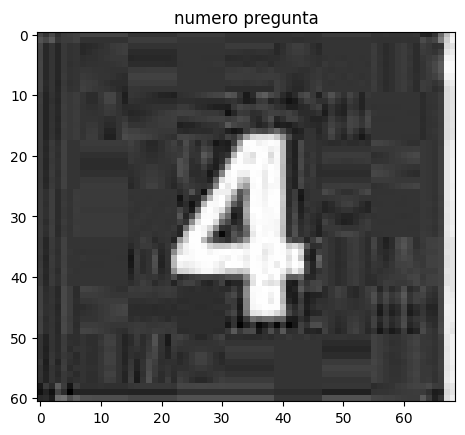

In [39]:
# plot image
fig,ax = plt.subplots()    
myax = ax.imshow(img1, cmap=cm.gray)

ax.set_title('numero pregunta')

plt.show()

In [42]:
# pasamos el num a texto
text = pytesseract.image_to_string(img1, config='--psm 10 --oem 3 -c tessedit_char_whitelist=0123456789') 
text = re.sub('[^A-Za-z0-9]+', '', text)
text

'4'

In [65]:
from os import listdir

def ls(ruta = r'data\output'):
    return listdir(ruta)

## obtener nombres de las carpetas (divididas segun rbd)
output = r'data\output_preg'
rbd = ls(output)
nom_archivos = []
n_cantidad = []

In [69]:
## para cada carpeta, obtenemos los archivos
for nom_rbd in rbd:
    dir_rbd = nom_rbd
    dir_rbd = output + '\\'+ dir_rbd
    archivos = ls_nombres(dir_rbd)
    n_cantidad. extend([nom_rbd]*len(archivos))
    nom_archivos.extend(archivos)

# extraemos el nombre de la pregunta
nom_archivos = pd.DataFrame({'nombre_archivo': nom_archivos,
                             'rbd': n_cantidad})
nom_archivos['preg'] = [x.split('\\')[-1].replace('.jpg', '') for x in nom_archivos['nombre_archivo']]
nom_archivos['id_preg'] = [x[x.index('_')+1:] for x in nom_archivos['preg']]



,nombre_archivo,rbd,preg,id_preg
0,4008570_p1.jpg,00229,4008570_p1,p1
1,4008570_p10.jpg,00229,4008570_p10,p10
2,4008570_p11.jpg,00229,4008570_p11,p11
3,4008570_p12.jpg,00229,4008570_p12,p12
4,4008570_p13.jpg,00229,4008570_p13,p13
...,...,...,...,...
10744,4017456_p27.jpg,00587,4017456_p27,p27
10745,4017456_p28.jpg,00587,4017456_p28,p28
10746,4017456_p29.jpg,00587,4017456_p29,p29
10747,4017456_p3.jpg,00587,4017456_p3,p3


In [71]:
nom_archivos = nom_archivos[nom_archivos['id_preg']!= 'p1']
nom_archivos = nom_archivos[nom_archivos['id_preg']!= 'p_']

In [77]:
nom_archivos.iloc[0]

nombre_archivo    4008570_p10.jpg
rbd                         00229
preg                  4008570_p10
id_preg                       p10
Name: 1, dtype: object

In [73]:
from pytesseract import pytesseract 
path_to_tesseract = r'C:\Users\jmpreussa\AppData\Local\Programs\Tesseract-OCR\tesseract.exe '#r"C:\Users\jmpreussa\Downloads\tesseract.exe"
pytesseract.tesseract_cmd = path_to_tesseract 

In [80]:
num_texto = []
n_archv = nom_archivos.shape[0]

for id_img in range(n_archv):
    print('revisando imagen ' + str(id_img))
    # procesamos la imagen
    imagen = nom_archivos.iloc[id_img]
    
    path_img = output+ '\\\\' + imagen['rbd'] + '\\\\'+ imagen['nombre_archivo']
    
    if not imagen['nombre_archivo'] in ['p_, p1']:
        img1 = cv2.imread(path_img)
        img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)

        x11 = img1.shape[0] -66
        y11 = img1.shape[1] -70
        img1 = func.recorte_imagen(img1, 5, x11, 1, y11)
        
        # pasamos el num a texto
        text = pytesseract.image_to_string(img1, config='--psm 10 --oem 3 -c tessedit_char_whitelist=0123456789') 
        text = re.sub('[^A-Za-z0-9]+', '', text)
        
        num_texto.append(text)


nom_archivos['num_texto'] = num_texto

nom_archivos


revisando imagen 0
revisando imagen 1
revisando imagen 2
revisando imagen 3
revisando imagen 4
revisando imagen 5
revisando imagen 6
revisando imagen 7
revisando imagen 8
revisando imagen 9
revisando imagen 10
revisando imagen 11
revisando imagen 12
revisando imagen 13
revisando imagen 14
revisando imagen 15
revisando imagen 16
revisando imagen 17
revisando imagen 18
revisando imagen 19
revisando imagen 20
revisando imagen 21
revisando imagen 22
revisando imagen 23
revisando imagen 24
revisando imagen 25
revisando imagen 26
revisando imagen 27
revisando imagen 28
revisando imagen 29
revisando imagen 30
revisando imagen 31
revisando imagen 32
revisando imagen 33
revisando imagen 34
revisando imagen 35
revisando imagen 36
revisando imagen 37
revisando imagen 38
revisando imagen 39
revisando imagen 40
revisando imagen 41
revisando imagen 42
revisando imagen 43
revisando imagen 44
revisando imagen 45
revisando imagen 46
revisando imagen 47
revisando imagen 48
revisando imagen 49
revisando 

,nombre_archivo,rbd,preg,id_preg,num_texto
1,4008570_p10.jpg,00229,4008570_p10,p10,10
2,4008570_p11.jpg,00229,4008570_p11,p11,11
3,4008570_p12.jpg,00229,4008570_p12,p12,12
4,4008570_p13.jpg,00229,4008570_p13,p13,13
5,4008570_p14.jpg,00229,4008570_p14,p14,14
...,...,...,...,...,...
10743,4017456_p26.jpg,00587,4017456_p26,p26,26
10744,4017456_p27.jpg,00587,4017456_p27,p27,27
10745,4017456_p28.jpg,00587,4017456_p28,p28,28
10746,4017456_p29.jpg,00587,4017456_p29,p29,29


In [81]:
aux = nom_archivos[['id_preg','num_texto']].value_counts().reset_index(name = 'Cantidad_encontrada')

In [82]:
aux = aux.merge(nom_archivos['id_preg'].value_counts().reset_index(name = 'n_total_real'), how = 'left' , on = 'id_preg')

In [83]:
aux['dif']= aux['n_total_real']- aux['Cantidad_encontrada']

In [84]:
aux['dif'].value_counts()

dif
357    57
356    21
358    20
354    14
355     5
0       4
1       3
348     3
345     3
347     2
344     2
2       2
328     2
350     2
330     1
331     1
332     1
336     1
338     1
343     1
23      1
346     1
321     1
349     1
352     1
351     1
8       1
353     1
4       1
5       1
326     1
320     1
24      1
314     1
30      1
32      1
41      1
51      1
90      1
118     1
124     1
145     1
153     1
161     1
165     1
173     1
184     1
189     1
190     1
193     1
194     1
229     1
242     1
243     1
303     1
277     1
Name: count, dtype: int64

In [98]:
aux[aux['dif'] ==8]

,id_preg,num_texto,Cantidad_encontrada,n_total_real,dif
11,p28,28,351,359,8


In [99]:
nom_archivos[nom_archivos['id_preg']=='p28'][nom_archivos['num_texto']!= '28']

C:\Users\jmpreussa\AppData\Local\Temp\ipykernel_12224\1609585890.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  nom_archivos[nom_archivos['id_preg']=='p28'][nom_archivos['num_texto']!= '28']


,nombre_archivo,rbd,preg,id_preg,num_texto
2300,4008880_p28.jpg,00238,4008880_p28,p28,23
2660,4008926_p28.jpg,00239,4008926_p28,p28,23
3440,4009059_p28.jpg,00243,4009059_p28,p28,238
3800,4009867_p28.jpg,00269,4009867_p28,p28,238
5060,4010092_p28.jpg,00279,4010092_p28,p28,23
7340,4014186_p28.jpg,00426,4014186_p28,p28,23
7430,4014191_p28.jpg,00426,4014191_p28,p28,23
9440,4017306_p28.jpg,00583,4017306_p28,p28,238


In [ ]:
#4003683

In [ ]:
aux[aux['id_preg']=='p4']

,id_preg,num_texto,count
13,4_2,18,9
55,4_2,13,1


In [ ]:
aux[aux['count']!= 10]

,id_preg,num_texto,count
13,4_2,18,9
14,6_2,14,9
15,5_3,9,8
16,5_4,,8
17,6_1,13,8
18,3_4,5,8
19,3_2,23,8
20,1_0,,8
21,1_4,27,8
22,6_0,12,7


In [ ]:
nom_archivos[nom_archivos['num_texto'] == 'S']

,id_pregunta,preg,id_preg,correlacion_total,id_correlacion,num_texto
138,c:\Users\jmpreussa\Documents\simce\data\output...,4272369_3_4,3_4,0.430377,0,S


In [ ]:
nom_archivos.groupby('num_texto')['id_preg'].size()

num_texto
       10
1       2
10     10
11      5
12      8
       ..
t       1
v7      1
val     1
vod     1
zl      1
Name: id_preg, Length: 77, dtype: int64

In [ ]:
# original = cv2.imread(preguntas_comparar['id_pregunta'].iloc[0])
# image_to_compare = cv2.imread(preguntas_comparar['id_pregunta'].iloc[1])

In [ ]:
# 1) Check if 2 images are equals
if original.shape == image_to_compare.shape:
    print('Las imagenes tiene el mismo tamaño y canal')
    difference = cv2.subtract(original, image_to_compare)
    b, g, r = cv2.split(difference)
    print(cv2.countNonZero(b))
    if (cv2.countNonZero(b) == 0 and cv2.countNonZero(g) == 0 and cv2.countNonZero(r) == 0):
        print('Las imagenes son completamente iguales')
    else: 
        print('Las imagenes no son iguales')

# 2) Check la similitud de las dos imagenes
shift = cv2.SIFT_create()
kp_1, desc_1 = shift.detectAndCompute(original, None)
kp_2, desc_2 = shift.detectAndCompute(image_to_compare, None)

print("Keypoints 1st image", str(len(kp_1)))
print("Keypoints 2st image", str(len(kp_2)))

index_params = dict(algorithm=0, trees=5)
search_params = dict()

flann = cv2.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(desc_1, desc_2, k=2)

good_points = []
for m, n in matches:
    if m.distance < 0.6*n.distance:
        good_points.append(m)

number_keypoints = 0
if (len(kp_1) <= len(kp_2)):
    number_keypoints = len(kp_1)
else:
    number_keypoints = len(kp_2)

print("GOOD matches",len(good_points))
print("Que tan bueno es el match", len(good_points) / number_keypoints * 100, "%")

result = cv2.drawMatches(original, kp_1, image_to_compare, kp_2, good_points, None)
cv2.imshow("Result", cv2.resize(result, None, fx = 0.4, fy=0.4))
cv2.imwrite("Feature_matching.jpg", result)

cv2.imshow("Original", original)
cv2.imshow("Duplicate", image_to_compare)


Las imagenes tiene el mismo tamaño y canal
2007
Las imagenes no son iguales
Keypoints 1st image 33
Keypoints 2st image 29
GOOD matches 15
Que tan bueno es el match 51.724137931034484 %


In [ ]:
img1.shape

(795, 1393, 3)